In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Widrow-hoff Method

**Loss** 
$$ E(X) = \frac{1}{|X|} \sum_x e(x)$$ with: $$e(x) = \frac{1}{2}(T_x - O(x))^2$$ 

**Update rule**
$$ w_i(t + 1) = w_i(t) - \epsilon \nabla E(x)$$ with: $$\nabla E(x) = -(T_x - O(x))x_i$$

In [2]:
class PerceptronBinaryClassifier(object):

    def __init__(self):
        self.W = None
        self.num_classes = 2
        
    def loss(self, X, y, i):
        """
            Compute the loss function and its derivative.
        """
        loss = 0.5 * ((y - np.dot(self.W.T, X.T)) ** 2).mean()
        grad = (y[i] - np.dot(self.W.T, X[i])) *  X[i]
        
        return loss, grad
        
    def train(self, X, y, learning_rate=1e-2, tol=1e-10, num_iters=1000, verbose=True):
        """
            Train this perceptron binary classifier using stochastic gradient descent.
        """
        
        num_train, dim = X.shape[0], X.shape[1] 
         
        # Initialize W
        self.W = 0.001 * np.random.randn(dim)
        
        # Run stochastic gradient descent to optimize W
        loss_history = []
        it = 0
        while it < num_iters:
            i = np.random.choice(num_train)
            
            if it == 0:
                last_loss = None
            else:
                last_loss = loss
                
            # Evaluate loss and gradient
            loss, grad = self.loss(X, y, i)
            loss_history.append(loss)
            
            # Carry out parameter update
            self.W = self.W + learning_rate * grad
            
            if verbose and it % 100 == 0:
                print('iteration {} / {}: loss {}'.format(it, num_iters, loss))
            
            if last_loss and (abs(last_loss-loss) / loss) < tol:
                if verbose:
                    print('loss did not improve by {}'.format(tol))
                    print('breaking...')
                break
            
            it += 1
        
        return loss_history
    
    def predict(self, X):
        """ 
            Use the trained weights of the classifier to predict labels for
            data points.
        """
        
        y_pred = np.zeros(X.shape[0])
        
        y_pred = (np.dot(X, clf.W.T) > 0).astype(int)
        y_pred[y_pred == 0] = -1
        
        return y_pred
    
    def predict_scores(self, X):
        """ 
            Use the trained weights of the classifier to predict confidence scores
            for data points.
        """
        
        y_pred_scores = np.zeros(X.shape[0])
        
        y_pred_scores = np.dot(X, self.W.T)

        return y_pred_scores

In [3]:
def accuracy(y_true, y_pred):
    return (y_pred == y_true).mean()

# Dataset 1 - Logical OR Operator

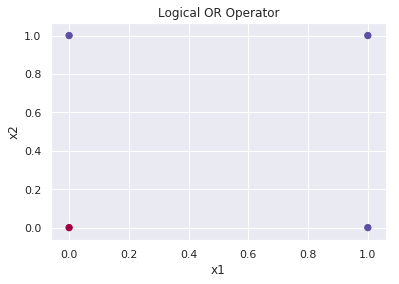

In [4]:
# ** Logical OR Operator **
def generate_OR():
    X = np.array([[0, 0], [0, 1], [1,0], [1, 1]])
    y = np.array([-1, 1, 1, 1])
    return X, y
# Visualize the data
X, y = generate_OR()
# bias trick
X = np.hstack((np.ones((X.shape[0], 1)), X))
plt.title("Logical OR Operator")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(X[:, 1], X[:, 2], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [5]:
clf = PerceptronBinaryClassifier()

In [6]:
loss_history = clf.train(X, y)

iteration 0 / 1000: loss 0.4971456792486201
iteration 100 / 1000: loss 0.2501967022476768
iteration 200 / 1000: loss 0.21380294051633011
iteration 300 / 1000: loss 0.19147542391965025
iteration 400 / 1000: loss 0.1689029893018051
iteration 500 / 1000: loss 0.15874067378082996
iteration 600 / 1000: loss 0.15191439700027803
iteration 700 / 1000: loss 0.14477459739293325
iteration 800 / 1000: loss 0.1369088592893016
iteration 900 / 1000: loss 0.13355118232050475


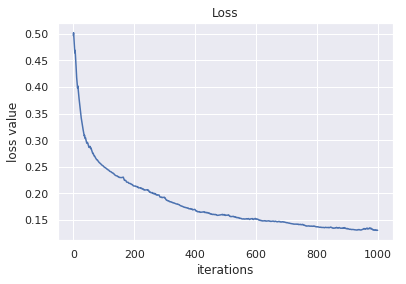

In [7]:
plt.title("Loss")
plt.xlabel("iterations")
plt.ylabel("loss value")
plt.plot(loss_history)

In [8]:
y_pred = clf.predict(X)
acc = accuracy(y_pred, y)
print("Accuracy of the model : {}".format(acc))

Accuracy of the model : 1.0


$$\sum_i w_i x_i = 0 $$
If $i=2$:
$$w_0 + w_1 x_1 + w_2 x_2 = 0$$
$$x_2 = \frac{1}{w_2} \times (-w_0 - w_1 x_1)$$

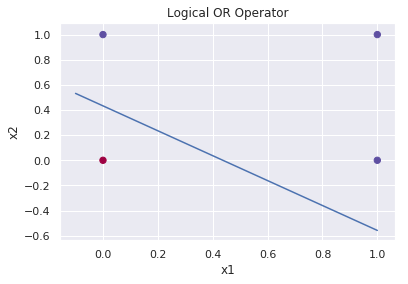

In [9]:
x1 = np.linspace(-0.1, 1, 100)
x2 = ( 1/clf.W[2] ) * (-clf.W[0] - clf.W[1] * x1)
plt.scatter(X[:, 1], X[:, 2], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Logical OR Operator")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x1, x2)
plt.show()

# Dataset 2 - Artificial Data

Data.shape = (20, 3)
Labels.shape = (20,)


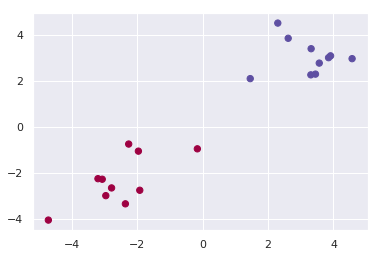

In [10]:
X0 = np.random.randn(10,2) + 3
X1 = np.random.randn(10,2) - 3
y0 = np.ones(10)
y1 = -np.ones(10)
X = np.concatenate([X0, X1])
X = np.hstack((np.ones((X.shape[0], 1)), X))
print("Data.shape = {}".format(X.shape))
y = np.concatenate([y0, y1])
print("Labels.shape = {}".format(y.shape))
plt.scatter(X[:, 1], X[:, 2], c=y, s=40, cmap=plt.cm.Spectral)

iteration 0 / 1000: loss 0.49765527983650176
iteration 100 / 1000: loss 0.03780078388269957
iteration 200 / 1000: loss 0.048191082713598885
iteration 300 / 1000: loss 0.04727401527823351
iteration 400 / 1000: loss 0.03958440284234678
iteration 500 / 1000: loss 0.03752247044134897
iteration 600 / 1000: loss 0.03985511472845518
iteration 700 / 1000: loss 0.038893145136431787
iteration 800 / 1000: loss 0.04092736319754867
iteration 900 / 1000: loss 0.038673857322610264


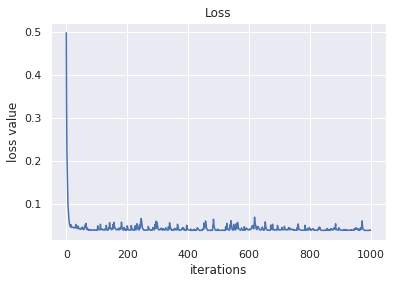

In [11]:
clf = PerceptronBinaryClassifier()
loss_history = clf.train(X, y)
plt.title("Loss")
plt.xlabel("iterations")
plt.ylabel("loss value")
plt.plot(loss_history)

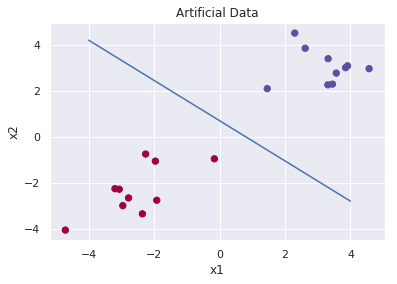

In [12]:
x1 = np.linspace(-4, 4, 100)
x2 = ( 1/clf.W[2] ) * (-clf.W[0] - clf.W[1] * x1)
plt.scatter(X[:, 1], X[:, 2], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Artificial Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x1,x2)
plt.show()

In [13]:
y_pred = clf.predict(X)
acc = accuracy(y_pred, y)
print("Accuracy of the model : {}".format(acc))

Accuracy of the model : 1.0


# Dataset 3 - Digits

In [14]:
from urllib.request import urlretrieve
from os.path import exists

path_to_file = './zip.train.gz'
url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz'

if not exists(path_to_file):
    urlretrieve(url, path_to_file)

In [15]:
# Loading data
train = np.loadtxt(path_to_file)
X_train, y_train = train[:,1:], train[:,0]

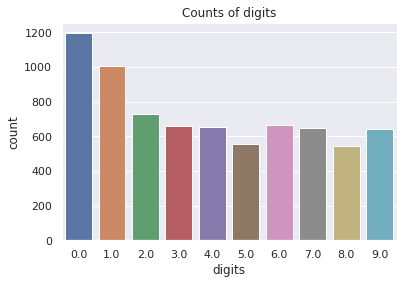

In [16]:
plt.title("Counts of digits")
plt.xlabel("digits")
sns.countplot(y_train)

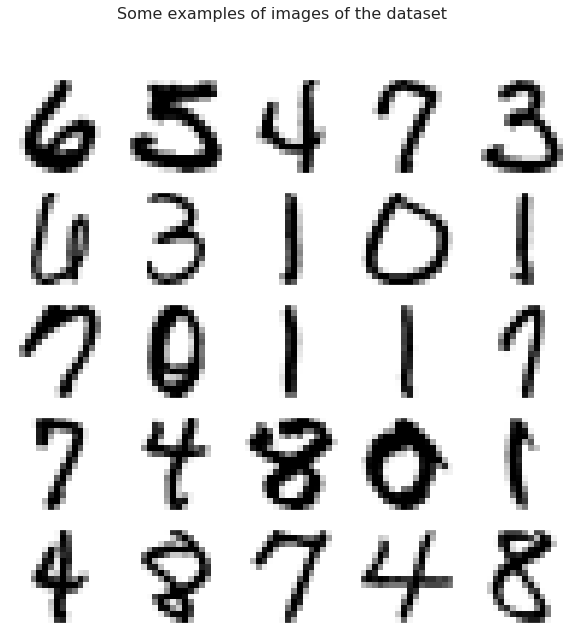

In [17]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(16, 16), cmap=plt.cm.binary)
    # plt.xlabel(y_train[i])
plt.show()

https://en.wikipedia.org/wiki/Multiclass_classification

In [19]:
class OneVsAllClassifier(object):

    def __init__(self):
        self.clfs = None
        self.loss_histories = None
        self.num_classes = None
        
    def train(self, X, y, learning_rate=1e-3, tol=1e-10, num_iters=300, verbose=True):
        """
            Train this perceptron OneVsAll classifier using multiple Perceptron Binary Classifiers.
        """
        
        digits = np.unique(y)
        self.clfs = []
        self.loss_histories = []
        self.num_classes = len(digits)

        for digit in digits:
            
            OneClassifier = PerceptronBinaryClassifier()
            y_temp = np.copy(y)
            y_temp[y_temp != digit] = -1
            y_temp[y_temp == digit] = 1
            
            if verbose:
                print("Training OneVsAll Classifier for digit {}".format(int(digit)))
            loss_history = OneClassifier.train(X, y_temp, learning_rate, tol, num_iters, verbose)
            
            self.clfs.append(OneClassifier)
            self.loss_histories = loss_history
            
        return self.loss_histories
    
    def predict(self, X):
        """ 
            Use the trained weights of the classifier to predict labels for
            data points.
        """
        num_train = X.shape[0]
        
        y_pred = np.zeros(num_train)
        scores = np.zeros(self.num_classes)
        
        for i in range(num_train):
            for digit in range(self.num_classes):
                scores[digit] = self.clfs[digit].predict_scores(X[i])
            
            y_pred[i] = np.argmax(scores)
                        
        return y_pred

In [20]:
clf = OneVsAllClassifier()
_ = clf.train(X_train, y_train)

Training OneVsAll Classifier for digit 0
iteration 0 / 300: loss 0.4951588974935652
iteration 100 / 300: loss 0.12327818421145033
iteration 200 / 300: loss 0.10701528942972853
Training OneVsAll Classifier for digit 1
iteration 0 / 300: loss 0.507289065776536
iteration 100 / 300: loss 0.08856899775667623
iteration 200 / 300: loss 0.069118900002902
Training OneVsAll Classifier for digit 2
iteration 0 / 300: loss 0.48540598583017636
iteration 100 / 300: loss 0.10591912908988929
iteration 200 / 300: loss 0.09602714476848355
Training OneVsAll Classifier for digit 3
iteration 0 / 300: loss 0.49507466959302454
iteration 100 / 300: loss 0.11830171452856095
iteration 200 / 300: loss 0.0944689561424404
Training OneVsAll Classifier for digit 4
iteration 0 / 300: loss 0.4909062806144666
iteration 100 / 300: loss 0.12597652829176004
iteration 200 / 300: loss 0.10192907482243972
Training OneVsAll Classifier for digit 5
iteration 0 / 300: loss 0.49681624379233424
iteration 100 / 300: loss 0.119385554

In [21]:
from urllib.request import urlretrieve
from os.path import exists

path_to_file = './zip.test.gz'
url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz'

if not exists(path_to_file):
    urlretrieve(url, path_to_file)
# Loading data
test = np.loadtxt(path_to_file)
X_test, y_test = test[:,1:], test[:,0]

In [22]:
y_pred = clf.predict(X_test)
acc = accuracy(y_pred, y_test)
print("Accuracy of the model : {}".format(acc))

Accuracy of the model : 0.752366716492277


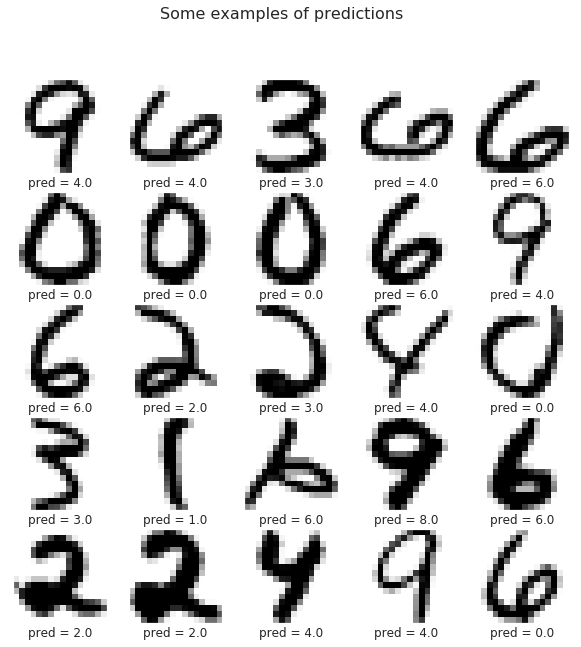

In [26]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of predictions", fontsize=16)
for i in range(25):
    plt.subplot(5, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(16, 16), cmap=plt.cm.binary)
    plt.xlabel("pred = {}".format(y_pred[i]))
plt.show()

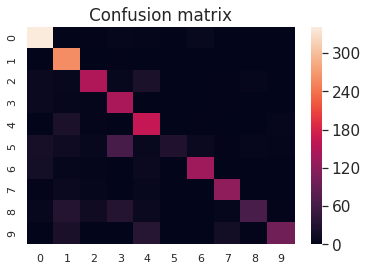

In [27]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.set(font_scale=1.4)
sns.heatmap(CM, annot=False,annot_kws={"size": 16}, ax = ax)
ax.set_title('Confusion matrix')
plt.show()